## Summary
<p>
This project is predicting income with decision tree using 
<a href= "https://scikit-learn.org/stable/modules/tree.html">
scikit learn.</a>
</p>
<p>
The project is using the DecisionTreeClassifier, fits different tree models and makes predictions. It is applying metrics like accuracy and auc. It is also adopting train-test-splits, decision tree visualization with export_graphviz, cross-validation and hyperparameter tuning with grid search.
</p>
<p>
The data set is taken from the 
<a href = "http://archive.ics.uci.edu/ml/datasets/Adult">Center for Machine Learning and Intelligent 
Systems</a>.
</p>

## Import packages

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
import seaborn as sns
import numpy as np
import math
import os
import pydotplus

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import sklearn
print("SKlearn version: ", sklearn.__version__)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# from sklearn.tree.export import export_text
# needs scikit-learn v0.21.2
# https://scikit-learn.org/stable/modules/tree.html

SKlearn version:  0.18.1


## Import data

In [265]:
income = pd.read_csv("income.csv", index_col=False)

## Explore data

In [266]:
income.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Data preparation

In [267]:
income_2 = income.copy()
income_2.dtypes
numeric_sex = pd.Categorical(income_2.sex)
income_2['sex']=numeric_sex.codes
print(income.sex.head(5))
print(income_2.sex.head(5))

0       Male
1       Male
2       Male
3       Male
4     Female
Name: sex, dtype: object
0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int8


In [268]:
income_2_names = list(income_2.columns)
for name in income_2_names:
    if type(income_2.loc[5, name])==str:
        numeric = pd.Categorical(income_2.loc[:,name])
        income_2[name] = numeric.codes

In [269]:
income_2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


## Model data

### Making a train-test-split with scikit

In [270]:
columns = ["age", "workclass", "education_num", "marital_status", "occupation", 
           "relationship", "race", "sex", "hours_per_week", "native_country"]

In [271]:
X_train, X_test, y_train, y_test = train_test_split(income_2[columns], income_2.high_income, test_size=0.2, random_state=0)

In [272]:
print(X_train.shape)
income_fn = list(X_train.columns)
print(list(X_train.columns))
# y_train=y_train.reshape((26048,1))
print(y_train.shape)

(26048, 10)
['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country']
(26048,)


In [273]:
print(X_test.shape)
# y_test=y_test.reshape((6513,1))
print(y_test.shape)

(6513, 10)
(6513,)


### Making a train-test-split with numpy functions

In [274]:
# Random seed guarantees the shuffle creates the same results
# everytime it is executed
np.random.seed(1)
income_3 = income_2.reindex(np.random.permutation(income.index))
print(income_3.iloc[0:5,0:3])
train_max_row = math.floor(income_3.shape[0] * .8)
train = income_3[:train_max_row]
test = income_3[train_max_row:]
print(train.shape)
print(test.shape)

       age  workclass  fnlwgt
9646    62          6   26911
709     18          4  208103
7385    25          4  102476
16671   33          4  511517
21932   36          4  292570
(26048, 15)
(6513, 15)


### Instantiating a classifier and fitting the model 

In [275]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X=X_train, y=y_train)

In [276]:
clf_2 = DecisionTreeClassifier(random_state=1)
clf_2.fit(X=train[columns], y=train.high_income)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

####  Visualizing Decision Trees
<p>
   Decision trees visualized with different kind of parameters.
   A full tree is not visualized here as it is computational challenging.
</p>

In [277]:
feature_names_1 = list(X_train.columns)
print(feature_names_1)

class_names_1 = 'high_income'

['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country']


##### max_depth = 2

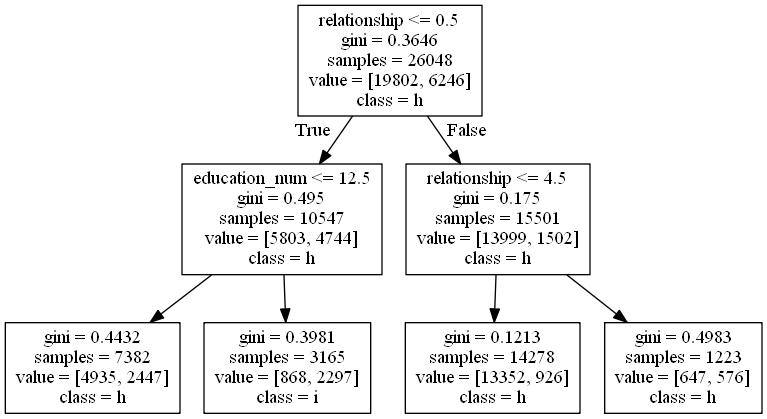

In [278]:

clf_33 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
clf_33 = clf_33.fit(X=X_train, y=y_train)

# Create DOT data
dot_data = tree.export_graphviz(clf_33, out_file=None, 
                                feature_names=feature_names_1,
                                class_names=class_names_1 )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

##### max_depth = 3

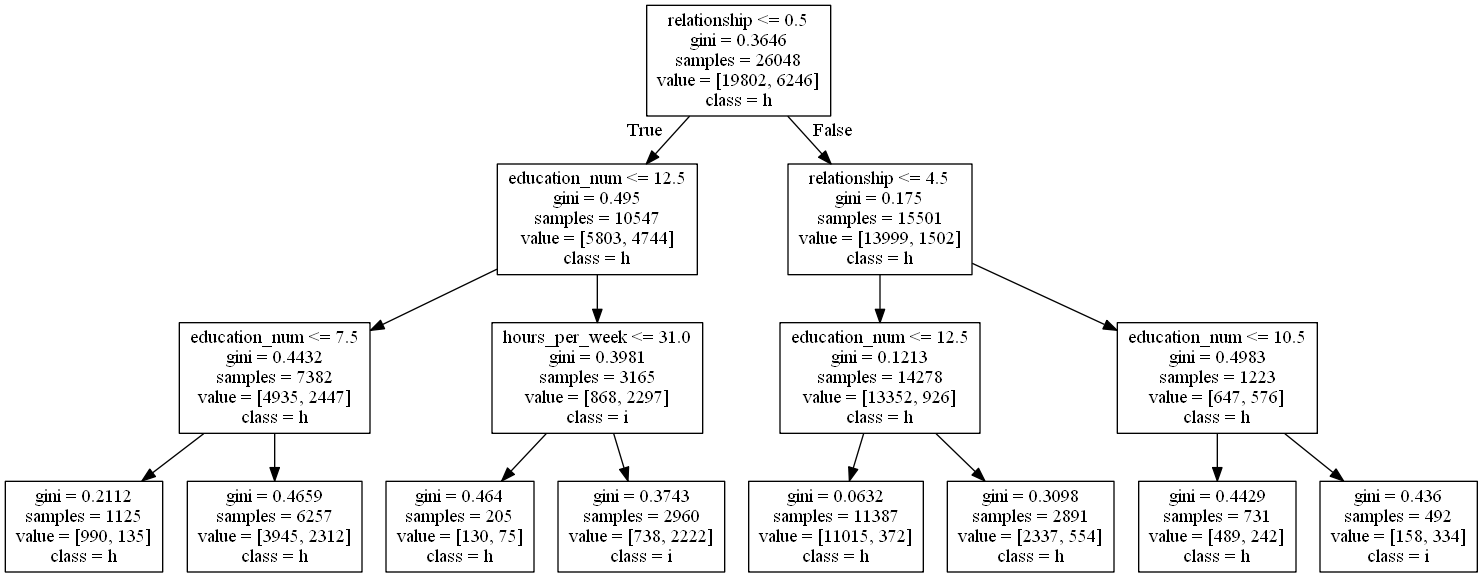

In [279]:

dot_data = StringIO()

clf_77 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
clf_77 = clf_77.fit(X=X_train, y=y_train)

# Create DOT data
dot_data = tree.export_graphviz(clf_77, out_file=None, 
                                feature_names=feature_names_1,
                                class_names=class_names_1 )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

##### max_depth = 4

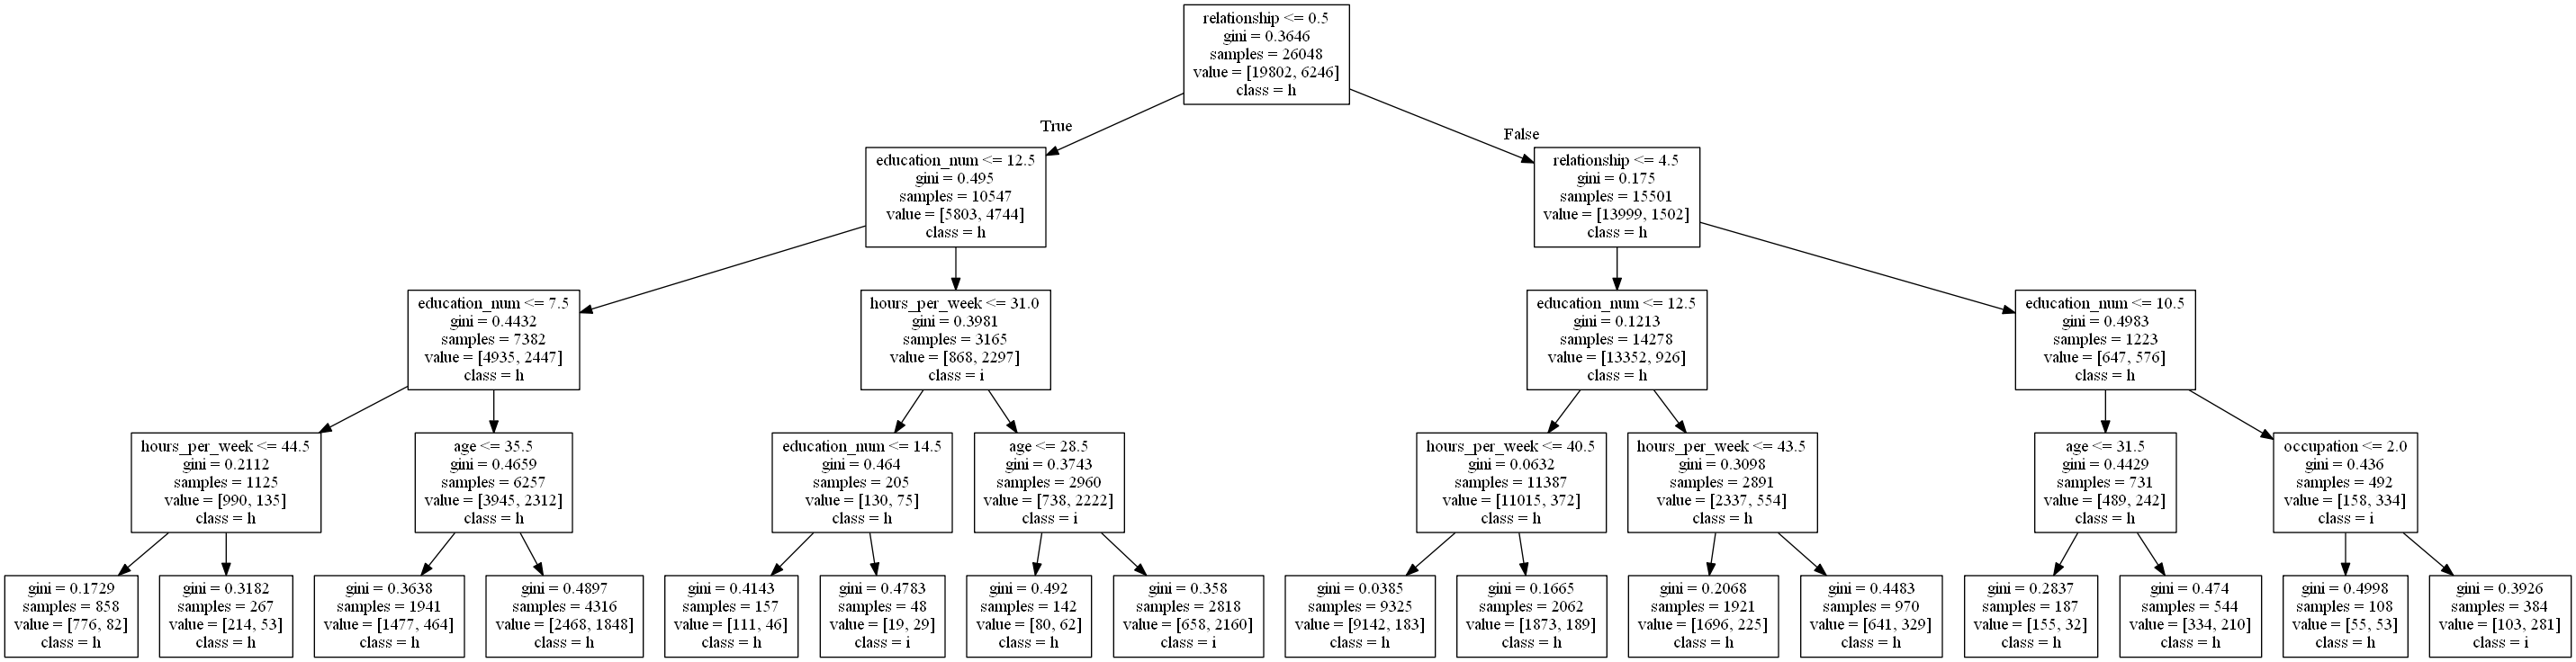

In [280]:
dot_data = StringIO()

clf_88 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
clf_88 = clf_88.fit(X=X_train, y=y_train)

# Create DOT data
dot_data = tree.export_graphviz(clf_88, out_file=None, 
                                feature_names=feature_names_1,
                                class_names=class_names_1 )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  



# Show graph
Image(graph.create_png())

##### max_depth = 3 / max_leaf_nodes=6

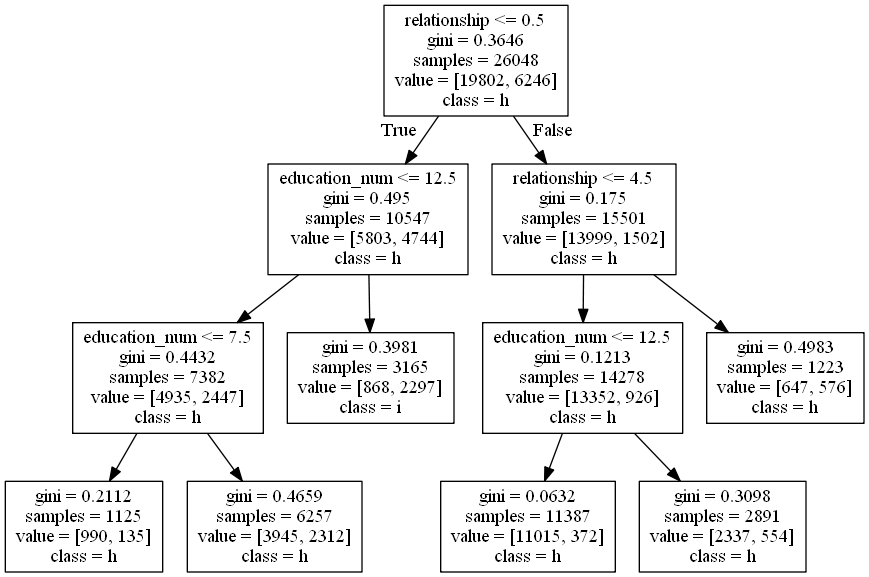

In [281]:
dot_data = StringIO()

clf_999 = tree.DecisionTreeClassifier(random_state=1, max_depth=4, 
                                      max_leaf_nodes=6)
clf_999 = clf_999.fit(X=X_train, y=y_train)

# Create DOT data
dot_data = tree.export_graphviz(clf_999, out_file=None, 
                                feature_names=feature_names_1,
                                class_names=class_names_1 )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Making a function to plot decision trees given a decision tree classifier.

In [282]:
def plot_decision_tree(clf,fn, cn, maxd=None):
    # Create DOT data
    dot_data = tree.export_graphviz(clf , out_file=None, 
                                feature_names=fn,
                                class_names=cn,
                                max_depth=maxd)

    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)  
    # Show graph
    image = Image(graph.create_png())
    return image

### Generating predictions

In [283]:
predictions_1 = clf.predict(X_test)
print(len(predictions_1))
print(predictions_1[15:30])

6513
[0 1 1 0 0 0 1 0 0 1 1 0 0 0 0]


In [284]:
predictions_2 = clf_2.predict(test[columns])
print(len(predictions_2))
print(predictions_2[15:30])

6513
[0 1 0 0 0 0 0 0 0 0 1 0 0 1 0]


Accordance

In [285]:
df_pred_1 = pd.DataFrame([predictions_1, predictions_2]).T
df_pred_1['match'] = (df_pred_1.iloc[:,0] - df_pred_1.iloc[:,1]).abs()
print(df_pred_1[15:20])
print(df_pred_1.match.value_counts())
print(len(df_pred_1[df_pred_1.match == 0]))

    0  1  match
15  0  0      0
16  1  1      0
17  1  0      1
18  0  0      0
19  0  0      0
0    4167
1    2346
Name: match, dtype: int64
4167


### Evaluating predictions with Receiver Operating Characteristic Curve (ROC AUC)  

<p>
The Area under the ROC curve (AUC) is a measure of accuracy of predictions. It is used for binary classfication setting up a trade off
between the True positive rate and the False positive rate.
An AUC score of 0.5 is purely random and so is the accuracy. 
An AUC score of 1 has a perfect accuracy.
</p>
More information<a href ="https://datascienceplus.com/interpretation-of-the-auc/"> datascienceplus</a>

### Comparing with roc_auc_score of test data

In [286]:
pd.crosstab(y_test, predictions_1, rownames=['condition'], 
            colnames=['predictions'])

predictions,0,1
condition,,
0,4218,700
1,772,823


In [287]:
# roc_auc_score(y_true, y_scores)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
roc_scores_1 = roc_auc_score(y_test, predictions_1)
print(roc_scores_1)

0.686826589293


This means the accuracy is rather low.

In [288]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_1)
roc_auc_1 = auc(false_positive_rate, true_positive_rate)

print(roc_auc_1)
print(len(false_positive_rate))
print(false_positive_rate)
print(len(true_positive_rate))
print(true_positive_rate)
print(thresholds)

0.686826589293
3
[ 0.          0.14233428  1.        ]
3
[ 0.          0.51598746  1.        ]
[2 1 0]


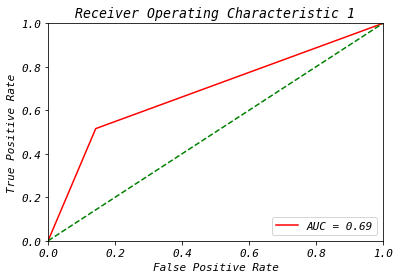

In [289]:
plt.title('Receiver Operating Characteristic 1')
plt.plot(false_positive_rate, true_positive_rate, 'r',
label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [290]:
roc_scores_2 = roc_auc_score(test.high_income, predictions_2)
print(roc_scores_2)

0.693465632475


Generating roc_scores_2 but this time using the rates extracted from
roc_curve.

In [291]:
false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(test.high_income, predictions_2)
roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)
print(roc_auc_2)

0.693465632475


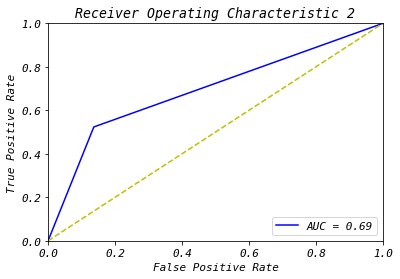

In [292]:
plt.title('Receiver Operating Characteristic 2')
plt.plot(false_positive_rate_2, true_positive_rate_2, 'b',
label='AUC = %0.2f'% roc_auc_2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'y--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparing with roc_auc_score of training data

In [293]:
predictions_3 = clf.predict(train[columns])
print(roc_auc_score(train.high_income, predictions_3))

0.894294647184


In [294]:
pd.crosstab(train.high_income, predictions_3, rownames=['conditions'],
            colnames=['predictions'])

predictions,0,1
conditions,,
0,19180,664
1,1104,5100


In [295]:
false_positive_rate_3, true_positive_rate_3, thresholds_3 = roc_curve(train.high_income, predictions_3)
roc_auc_3 = auc(false_positive_rate_3, true_positive_rate_3)
print(roc_auc_3)

0.894294647184


The auc roc curve metric of the training data is with 0.894294 higher than
that of the testing data with 0.693465632475. This points to overfitting.

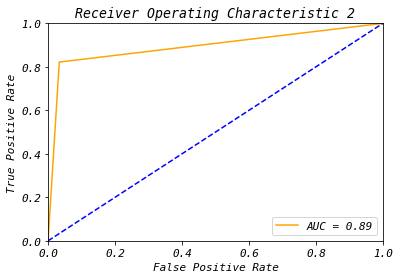

In [296]:
plt.title('Receiver Operating Characteristic 2')
plt.plot(false_positive_rate_3, true_positive_rate_3, 'orange',
label='AUC = %0.2f'% roc_auc_3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [297]:
predictions_4 = clf.predict(X_train)
print(roc_auc_score(y_train, predictions_4))


0.946706989332


In [298]:
crosstab_4=pd.crosstab(y_train, predictions_4, rownames=['conditions'],
                       colnames=['predictions'])
crosstab_4

predictions,0,1
conditions,,
0,19657,145
1,620,5626


In [299]:
false_positive_rate_4, true_positive_rate_4, thresholds_4 = roc_curve(y_train, predictions_4)
roc_auc_4 = auc(false_positive_rate_4, true_positive_rate_4)
print(roc_auc_4)

0.946706989332


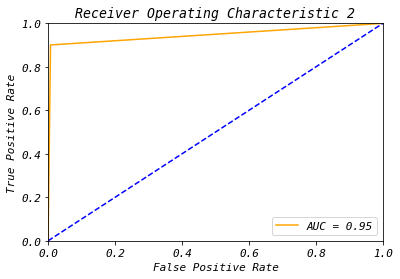

In [300]:
plt.title('Receiver Operating Characteristic 2')
plt.plot(false_positive_rate_4, true_positive_rate_4, 'orange',
label='AUC = %0.2f'% roc_auc_4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC of the training data is far higher approaching one than those
of the test data.This speaks for overfitting by the model.

### Hyperparameter tuning - manually

<p>
In machine learning hyperparameters control the learning process on a
granular level. Fine tuning the hyperparameters allows 
for better predictions. The hyperparameters utilized here are:
</p>
<ul>
<li>max_depth</li>     
<li>min_samples_split</li>  
<li>min_samples_leaf</li>
<li>min_weight_fraction_leaf</li>
<li>max_leaf_nodes</li>
</ul>    

More on <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">scikit learn</a>.

<p>
The hyperparameter tuning is here done manually and does not use techniques like Grid Search and Random Search. 
</p>
    


In [301]:
# clf = tree.DecisionTreeClassifier(random_state=1)
clf_t1 = tree.DecisionTreeClassifier(random_state=1, min_samples_split=11)
clf_t1 = clf_t1.fit(X=X_train, y=y_train)

predictions_t1 = clf_t1.predict(X_train)
train_auc_t1 = roc_auc_score(y_train, predictions_t1 )

predictions_t2 = clf_t1.predict(X_test)
test_auc_t1 = roc_auc_score(y_test, predictions_t2 )

print(train_auc_t1)
print(test_auc_t1)

0.847129319617
0.70682127327


0.847129319617


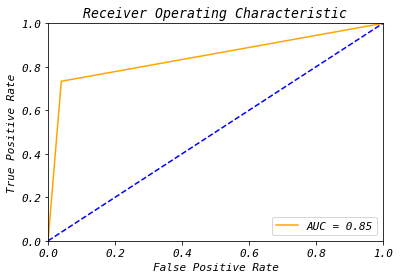

0.70682127327


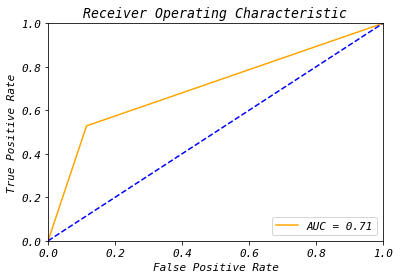

In [302]:
false_positive_rate_t1, true_positive_rate_t1, thresholds_t1 = roc_curve(y_train, predictions_t1)
roc_auc_t1 = auc(false_positive_rate_t1, true_positive_rate_t1)
print(roc_auc_t1)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_t1, true_positive_rate_t1, 'orange',
label='AUC = %0.2f'% roc_auc_t1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


false_positive_rate_t1_test, true_positive_rate_t1_test, thresholds_t1_test = roc_curve(y_test, predictions_t2)
roc_auc_t1_test = auc(false_positive_rate_t1_test, true_positive_rate_t1_test)
print(roc_auc_t1_test)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_t1_test, true_positive_rate_t1_test, 'orange',
label='AUC = %0.2f'% roc_auc_t1_test)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [303]:

clf_t2 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
clf_t2 = clf_t2.fit(X=X_train, y=y_train)

predictions_t2 = clf_t2.predict(X_train)
train_auc_t2 = roc_auc_score(y_train, predictions_t2 )

predictions_t2 = clf_t2.predict(X_test)
test_auc_t2 = roc_auc_score(y_test, predictions_t2 )

print(train_auc_t2)
print(test_auc_t2)

0.748534094646
0.744862325205


Setting max depths results in similar auc values. This indicates
the training model does not overfit the data. Also the testing auc
is an improvement compared with 0.693465632475 above.

In [304]:
clf_t3 = DecisionTreeClassifier(random_state=1, max_depth=2,
                                     min_samples_split=115)
clf_t3 = clf_t3.fit(X=X_train, y=y_train)

predictions_t3 = clf_t3.predict(X_train)
train_auc_t3 = roc_auc_score(y_train, predictions_t3 )

predictions_t3 = clf_t3.predict(X_test)
test_auc_t3 = roc_auc_score(y_test, predictions_t3 )

print(train_auc_t3)
print(test_auc_t3)

0.661960703633
0.65696896182


Setting max depths to and min_samples_split to 115 
results in similar auc values. This indicates
the training model does not overfit the data. 
However it results in a lower accuracy.

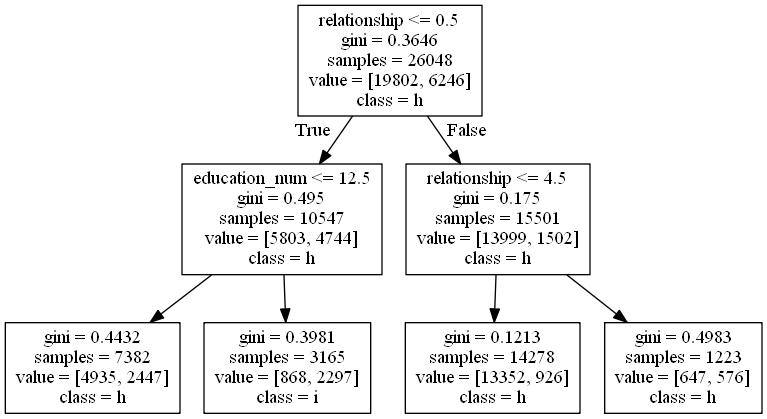

In [305]:
plot_decision_tree(clf=clf_t3,fn=feature_names_1,cn=class_names_1 )

Introducing noise to test for variance. Noise are random values.
In case the model is prone to overfitting the model is going to 
pick up on the noise and reinforce overfitting.

In [306]:
np.random.seed(1)
income_2["buzz"] = np.random.randint(4, size=income.shape[0])
income_2["buzz"].unique()

array([1, 3, 0, 2], dtype=int64)

In [307]:
columns_22 = list(income_2)

# remove('high_income')
columns_23 = [x for x in columns_22 if x != 'high_income']
print(columns_23)

X_23 = income_2[columns_23]
print(X_23.shape)
y_23 = income_2['high_income']
print(y_23.shape)

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'buzz']
(32561, 15)
(32561,)


In [308]:
X_train_23, X_test_23, y_train_23, y_test_23  = train_test_split(X_23, y_23, test_size=0.2, random_state=42)

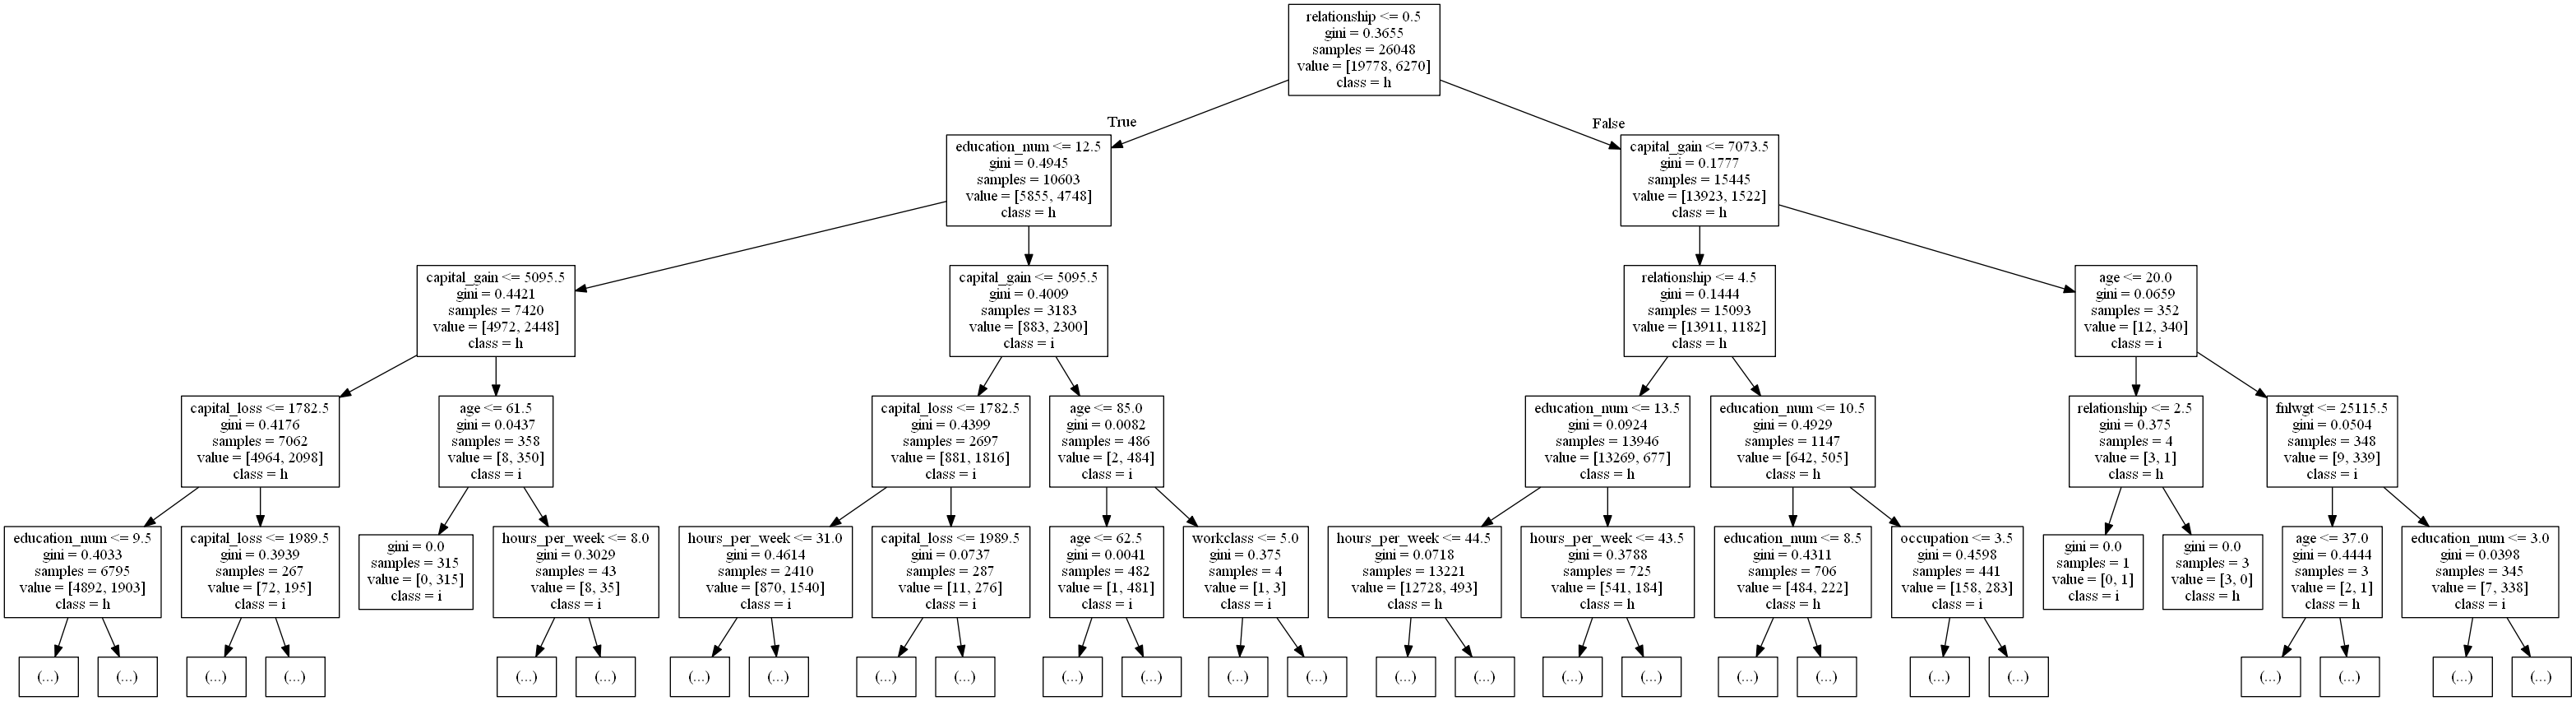

In [309]:
clf_23 = DecisionTreeClassifier(random_state=16)
clf_23 = clf_23.fit(X=X_train_23, y=y_train_23)

plot_decision_tree(clf=clf_23,fn=columns_23,
                   cn=class_names_1, maxd=4)

In [310]:

predictions_clf23_train = clf_23.predict(X_train_23)
print(predictions_clf23_train[0:4])
train_auc_clf23 = roc_auc_score( y_train_23, predictions_clf23_train)
print(train_auc_clf23)

predictions_clf23_test = clf_23.predict(X_test_23)
print(predictions_clf23_test[0:4])
test_auc_clf23 = roc_auc_score( y_test_23, predictions_clf23_test)
print(test_auc_clf23)

[1 1 0 0]
1.0
[0 1 1 0]
0.741583463015


Inserting random noise into the data increases the auc score of the 
training set. Decision tree classifiers are prone to overfitting.

### Hyperparameter tuning with GridSearch
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Cross validated grid search model 1

In [311]:
# define a param grid
param_grid = {'max_depth': np.arange(3, 10)}

clf_5555 = GridSearchCV(DecisionTreeClassifier(), param_grid)

clf_5555.fit(X_train, y_train)
clf_5555_preds = clf_5555.predict_proba(X_test)[:, 1]
clf_5555_performance = roc_auc_score(y_test, clf_5555_preds)

print ('Decisionclf_5555: Area under the ROC curve = {}'.format(clf_5555_performance))

Decisionclf_5555: Area under the ROC curve = 0.8741539300962111


In [312]:
# best_params_ defined in the dictionary
print(clf_5555.best_params_)
# best_score_: Mean cross-validated score of the best_estimator
print(clf_5555.best_score_)


{'max_depth': 7}
0.831388206388


Result: a max depth of 7 results in the best score of 0.83127

In [313]:
# all results of the cross validated grid search for the combinations
print(clf_5555.cv_results_)

{'split0_test_score': array([ 0.82851549,  0.82828515,  0.82828515,  0.83404353,  0.83761373,
        0.8341587 ,  0.83554071]), 'split1_test_score': array([ 0.82033859,  0.82218127,  0.82091443,  0.82874583,  0.83231602,
        0.83012784,  0.82367845]), 'split2_test_score': array([ 0.82193043,  0.82158489,  0.82227597,  0.82480995,  0.82423405,
        0.82123935,  0.82423405]), 'mean_test_score': array([ 0.8235949 ,  0.8240172 ,  0.82382525,  0.82919994,  0.83138821,
        0.82850891,  0.82781787]), 'std_test_score': array([ 0.00353965,  0.00302779,  0.00320233,  0.00378321,  0.00550144,
        0.00539706,  0.00546574]), 'rank_test_score': array([7, 5, 6, 2, 1, 3, 4]), 'split0_train_score': array([ 0.8227469 ,  0.82338036,  0.82482004,  0.83092427,  0.83691333,
        0.84186582,  0.85096458]), 'split1_train_score': array([ 0.82522315,  0.8263173 ,  0.8285632 ,  0.83553124,  0.84244169,
        0.84716384,  0.85465016]), 'split2_train_score': array([ 0.8249453 ,  0.82673039,  0

In [314]:
print(clf_5555.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [315]:
clf_5555_best = clf_5555.best_estimator_

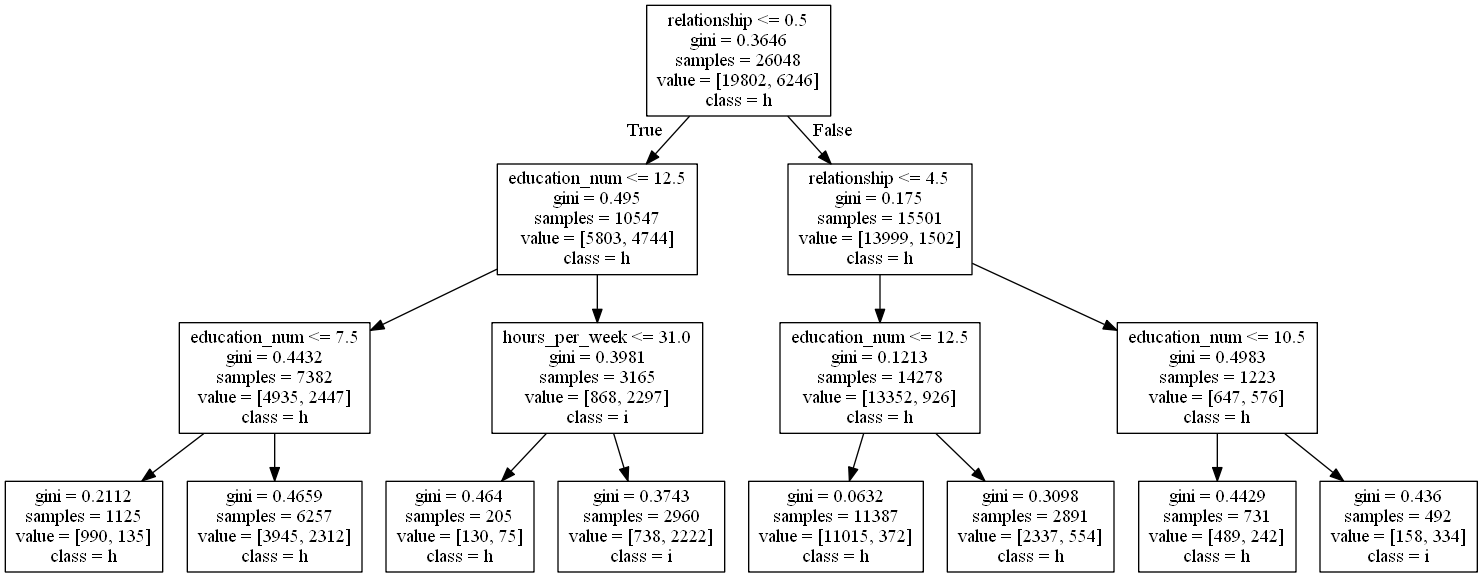

In [316]:
dot_data = StringIO()

clf_5555_best = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
clf_5555_best = clf_5555_best.fit(X=X_train, y=y_train)

# Create DOT data
dot_data = tree.export_graphviz(clf_5555_best, out_file=None, 
                                feature_names=feature_names_1,
                                class_names=class_names_1 )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Increase the size of the output image
# not in the defined function above
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"8!"')
pydot_graph.write_png('resized_tree.png')


# Show graph
Image(graph.create_png())



#### Cross validated grid search model 2

In [317]:

clf_787 = DecisionTreeClassifier(min_samples_split=4, random_state=0)
clf_787.fit(X_train, y_train)
y_pred_class = clf_787.predict(X_test)

# Accuracy
accuracy_score(y_test, y_pred_class)

0.78550591125441427

In [318]:
# tuning max depth
param_grid = {'max_depth': np.arange(3, 10)}

# instantiate grid search over a 10 fold cross validation
grid_787 = GridSearchCV(clf_787, param_grid, cv=12, scoring='accuracy')

# fit the grid with data
grid_787.fit(X_train, y_train)

GridSearchCV(cv=12, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [319]:
# examine the best model
# Single best score achieved across all params (max_depth)
print(grid_787.best_score_)
# Achieved by tuning 'max_depth'
print(grid_787.best_params_)


0.833845208845
{'max_depth': 7}


Result: a max depth of 7 results in the best score of 0.833845.

In [320]:
# Complete model used to achieved the best score, while only max depth
# was tuned
print(grid_787.best_estimator_)
clf_787_best = grid_787.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')


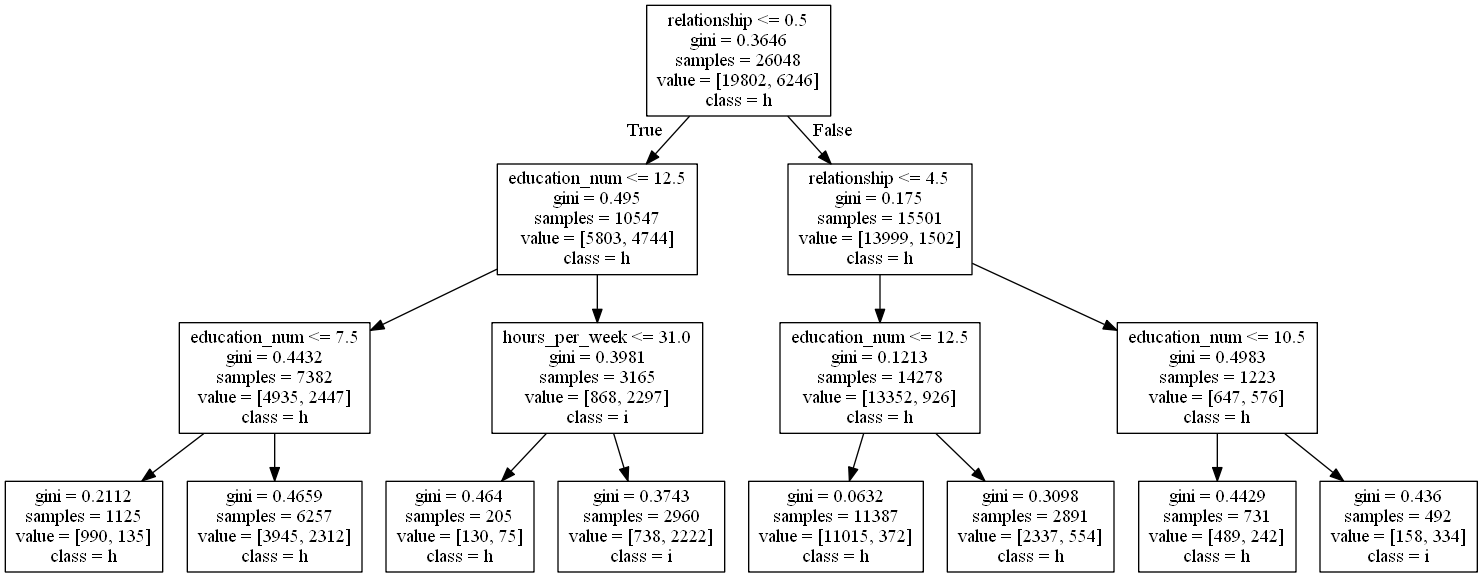

In [321]:

dot_data = StringIO()

clf_787_best = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
clf_787_best = clf_787_best.fit(X=X_train, y=y_train)

# Create DOT data
dot_data = tree.export_graphviz(clf_787_best, out_file=None, 
                                feature_names=feature_names_1,
                                class_names=class_names_1 )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Increase the size of the output image
# not in the defined function above
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')


# Show graph
Image(graph.create_png())

